In [22]:
print(__doc__)

Automatically created module for IPython interactive environment


In [23]:
import numpy as np
import wave as wv
import matplotlib.pyplot as plt
from scipy import signal
import scipy.io.wavfile
from sklearn.decomposition import FastICA

# Get samples from wav files

6121.11973246


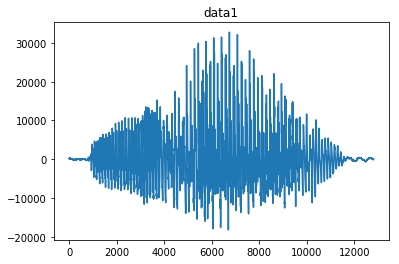

4540.79015605


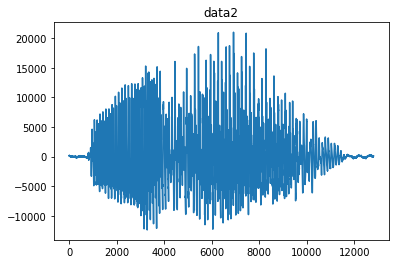

In [24]:
sourceFilesPrefix="AudioSources\\oneNumber-"
resultFilesPrefix="AudioResults\\oneNumber-"
rate1, sample1_data = scipy.io.wavfile.read(sourceFilesPrefix+"1.wav")
print(sample1_data.std(axis=0))
plt.figure(1)
plt.plot(sample1_data)
plt.title("data1")
plt.show()

rate2, sample2_data=scipy.io.wavfile.read(sourceFilesPrefix+"2.wav")
print(sample2_data.std(axis=0))
plt.figure(2)
plt.plot(sample2_data)
plt.title("data2")
plt.show()

In [25]:
S1=np.c_[sample1_data,sample2_data]
S2=np.c_[sample1_data,sample2_data]
print(S)
median=S.std(axis=0)
print(median)
S= S/median
print(S)

[[148 159]
 [174 141]
 [195 159]
 ..., 
 [-19  66]
 [ -7  68]
 [ 17 124]]
[ 6121.11973246  4540.79015605]
[[ 0.02417858  0.03501593]
 [ 0.02842617  0.03105186]
 [ 0.03185692  0.03501593]
 ..., 
 [-0.00310401  0.01453492]
 [-0.00114358  0.01497537]
 [ 0.00277727  0.02730802]]


In [32]:
mixingMatrix1=np.array([[1,2]])
mixingMatrix2=np.array([[10,4]])
X1=np.dot(S1,mixingMatrix1.T)
X2=np.dot(S2,mixingMatrix2.T)

ica = FastICA(n_components=2)
S_=ica.fit_transform(S)
A_=ica.mixing_
M_=ica.mean_
print(A_)
print(M_)

NameError: name 'S1' is not defined

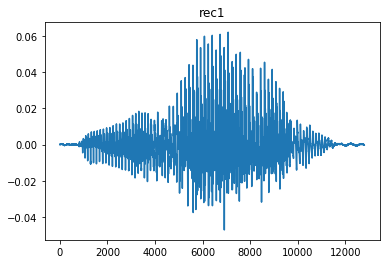

[ -1.54896427e-06   8.55265856e-05   9.43635317e-05 ...,  -1.66586967e-04
  -1.45878400e-04  -2.02734257e-04]


In [27]:
plt.figure(3)
plt.plot(S_.T[0])
plt.title("rec1")
plt.show()
print(S_.T[0])

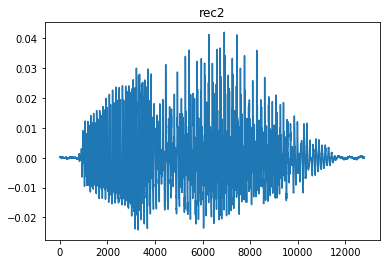

[ 0.00030894  0.00027143  0.00030623 ...,  0.00013252  0.00013583
  0.00024648]


In [28]:
plt.figure(4)
plt.plot(S_.T[1])
plt.title("rec2")
plt.show()
print(S_.T[1])

In [29]:
scipy.io.wavfile.write(resultFilesPrefix+"1.wav",16000,S_.T[0])

In [30]:
scipy.io.wavfile.write(resultFilesPrefix+"2.wav",16000,S_.T[1])